Analysis of the MCMC optimization 

In [21]:
using DataFrames , CSV , Statistics
using PyPlot

## directory
rootdir = "/home/stephane/Science/GAIA"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/testfull2"

cd(wdir)

In [22]:
## Reading and joining the results from normal and full MCMC dbscan optimization.

mc     = CSV.read("ngclist-mcmc.csv" , delim = ";")
mcfull = CSV.read("ngclist-mcmc_full.csv", delim = ";")
mcj    = join(mc,mcfull, on = :votname, makeunique=true)

,votname,epsm,epsd,mneim,mneid,mclm,mcld,qcm,qcd,qnm,qnd,epsm_1,epsd_1,mneim_1,mneid_1,mclm_1,mcld_1,qcm_1,qcd_1,qnm_1,qnd_1,w3dm,w3dd,wvelm,wveld,whrdm,whrdd
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,NGC 1027-1.2deg.vot,2.81091,0.497231,7.74226,4.60073,16.0173,6.19727,2.37704,0.120941,309.727,78.981,2.47708,0.526362,6.9677,4.07744,17.4868,6.58876,2.4839,0.0952785,325.146,83.7489,5.2378,2.30478,8.10351,3.2289,2.12502,0.826859
2,NGC 1039-3.6deg.vot,2.23882,0.397804,8.9314,5.69798,14.4998,6.43154,2.81623,0.0901986,264.86,32.4776,2.00243,0.500758,7.86114,4.8461,18.9777,7.87349,2.77257,0.109067,272.844,43.212,4.30735,2.15442,6.98069,2.50838,1.88658,0.810901
3,NGC 129-0.8deg.vot,3.68256,0.529179,6.52314,3.66353,16.1002,6.35154,1.70897,0.313986,143.812,75.7869,1.94361,0.600421,6.15152,3.78195,17.3583,6.80891,2.19753,0.0603603,242.257,41.2274,1.62407,1.1468,8.3898,2.96506,2.12939,0.805193
4,NGC 1342-1.4deg.vot,2.65245,0.57807,8.99967,5.3097,14.8948,6.37394,2.36438,0.110337,169.706,25.5366,2.09667,0.641952,7.38761,4.4161,16.6277,6.27495,2.47486,0.0860875,183.812,24.1283,3.27573,1.83168,8.19842,2.85083,2.00252,0.833275
5,NGC 1348-0.6deg.vot,3.05009,0.937028,9.68132,6.5612,5.76424,2.81799,1.16943,0.319335,11.0123,38.4247,5.11438,0.793122,6.22211,3.5226,17.4159,6.56601,1.30879,0.044525,1119.77,389.779,9.2508,3.48855,0.975762,0.602738,2.17839,0.798747
6,NGC 1496-0.3deg.vot,3.99421,0.738607,7.1715,5.42549,11.7752,4.97982,1.2355,0.209244,19.9277,5.04171,2.68812,0.621709,7.35864,4.04549,16.63,6.22737,1.66214,0.0852951,82.7729,18.5742,1.10576,0.560195,9.34507,2.62411,1.99284,0.87859
7,NGC 1502-1.5deg.vot,3.55647,0.488869,7.63736,4.10497,16.6057,6.61231,1.98324,0.12611,105.088,29.2866,2.61249,0.697098,6.53014,3.69417,17.8478,6.32902,2.21112,0.0712596,136.88,35.9491,3.23823,1.9211,7.47536,2.13329,2.38006,0.896384


In [23]:
sc     = CSV.read("ngclist-SCproperties.csv",delim = ";")
scfull = CSV.read("ngclist-SCproperties_full.csv",delim = ";")
scj    = join(sc,scfull, on = :votname, makeunique=true)

,votname,nstars,distance,l,b,vl,vb,vrad,xdisp,ydisp,zdisp,vldisp,vbdisp,vraddisp,nstars_1,distance_1,l_1,b_1,vl_1,vb_1,vrad_1,xdisp_1,ydisp_1,zdisp_1,vldisp_1,vbdisp_1,vraddisp_1
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,NGC 1027-1.2deg.vot,286,1116.02,135.763,1.53614,-12.9471,6.34208,NaN,33.2948,4.05934,2.86483,1.31343,1.28639,NaN,335,1129.33,135.755,1.54499,-13.0773,6.39556,-43.8255,42.9243,3.89986,2.92076,1.29868,1.23115,NaN
2,NGC 1039-3.6deg.vot,266,512.538,143.67,-15.6649,7.74079,-11.6677,-6.92642,16.0652,3.31541,2.59041,0.857951,0.875041,10.554,270,512.18,143.67,-15.6731,7.74113,-11.6231,-6.91094,16.7384,3.31449,2.67701,0.82582,0.843585,10.5522
3,NGC 129-0.8deg.vot,125,1944.55,120.343,-2.54646,-24.5368,-8.15415,-30.2936,34.0626,4.92742,3.74141,1.67508,1.67646,NaN,228,1885.47,120.355,-2.54551,-23.9532,-7.86526,-39.8223,72.9617,6.94382,4.62177,1.365,1.13125,6.84108
4,NGC 1342-1.4deg.vot,176,662.373,154.922,-15.3254,4.62866,-2.84427,-5.08531,15.3509,3.50241,2.9365,0.830533,0.927695,8.46639,183,663.162,154.931,-15.3329,4.62676,-2.82043,-5.08531,16.2432,3.88535,3.08415,0.786355,0.822766,8.46639
5,NGC 1348-0.6deg.vot,8,173.56,146.898,-3.85453,27.6254,-6.81276,-3.2216,3.05119,1.02692,0.877703,0.347811,0.441279,0.51519,1151,621.848,146.989,-3.69659,22.1554,-7.52875,-12.3798,235.616,3.21171,3.21189,26.4957,18.0445,26.7875
6,NGC 1496-0.3deg.vot,22,1642.92,149.844,0.196893,12.8173,2.93308,-27.2262,12.0617,2.64078,2.51636,0.920289,1.62757,NaN,85,1636.24,149.838,0.187365,12.7029,2.98108,-27.2262,82.5627,2.39571,2.64729,1.26903,1.67172,NaN
7,NGC 1502-1.5deg.vot,96,1071.27,143.635,7.69218,0.651039,-5.36044,-14.7571,24.7286,2.83451,3.87631,0.842108,1.21276,NaN,122,1081.96,143.609,7.65522,0.559324,-5.33869,-14.7571,30.0223,4.1447,4.73551,0.790186,1.05126,NaN


In [24]:
println("## Summary :")
println("##")
println("## votable with dbscan-only :",size(sc))
println("## votable with dbscan-weighting :",size(scfull))
println("## Join votable :",size(scj))

## Summary :
##
## votable with dbscan-only :(8, 14)
## votable with dbscan-weighting :(7, 14)
## Join votable :(7, 27)


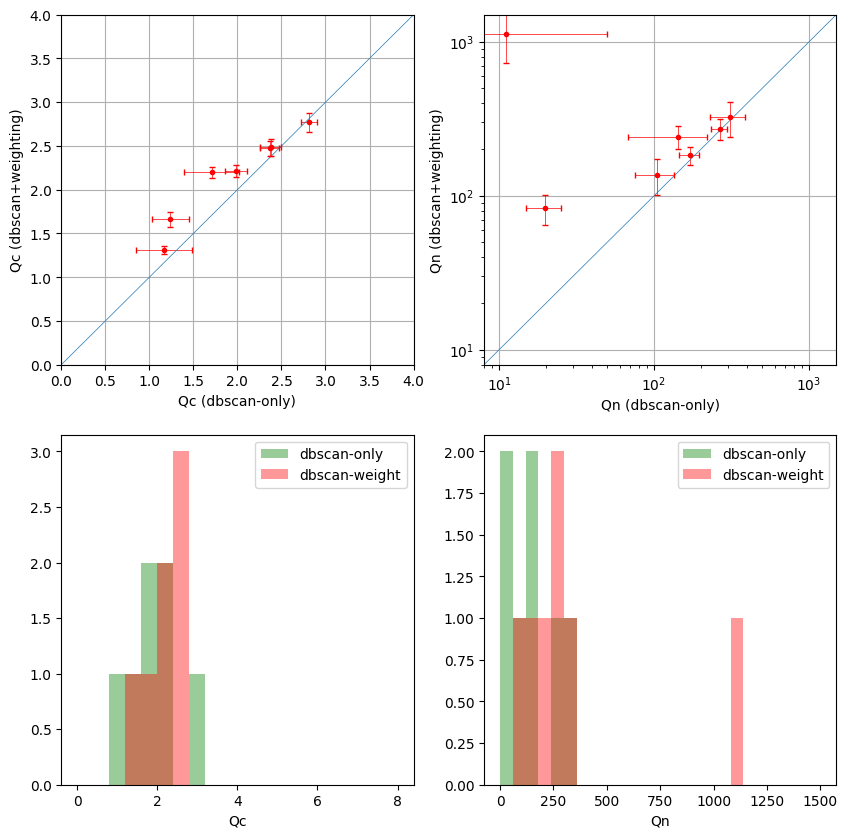

In [25]:
## Q comparisons

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10] ,linewidth = 0.5)
errorbar(mcj[:qcm],mcj[:qcm_1] , xerr=mcj[:qcd],yerr= mcj[:qcd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([0.,4.])
ax[:set_ylim]([0.,4.])
xlabel("Qc (dbscan-only)")
ylabel("Qc (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([1.,10000.],[1.,10000], linewidth = 0.5)
xscale("log")
yscale("log")
errorbar(mcj[:qnm],mcj[:qnm_1] , xerr=mcj[:qnd],yerr= mcj[:qnd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([8.,1500.])
ax[:set_ylim]([8.,1500.])
xscale("log")
yscale("log")
xlabel("Qn (dbscan-only)")
ylabel("Qn (dbscan+weighting)")

ax = subplot(223)
nbins = 20
h = plt[:hist](mcj[:qcm],nbins,range = [0,8], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qcm_1],nbins,range = [0,8], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qc")

ax = subplot(224)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qn")

show()

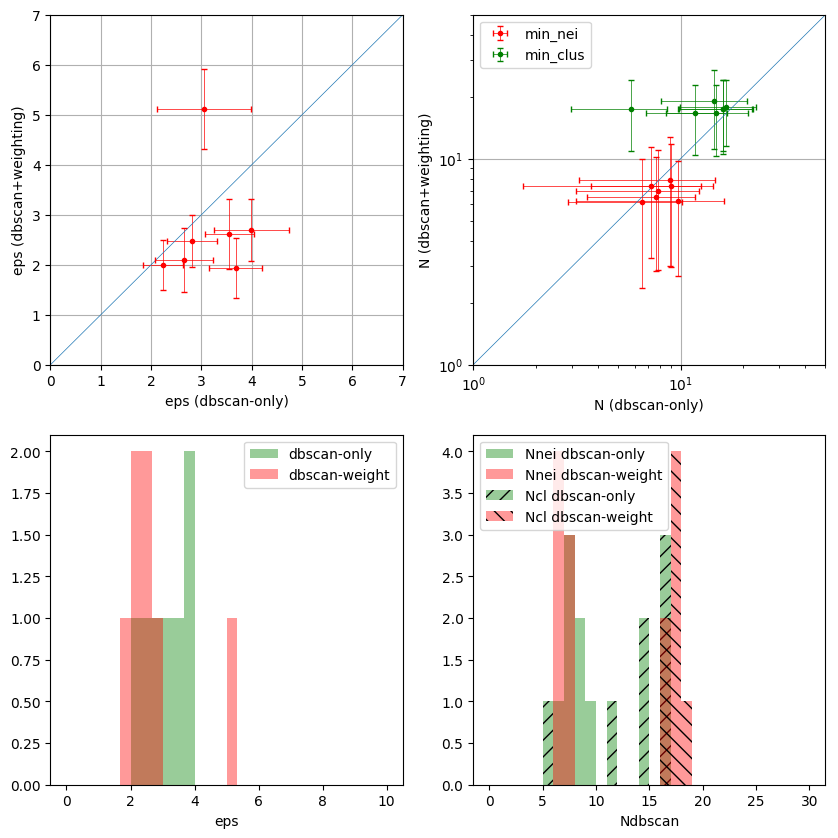

In [26]:
## comparison DBSCAN parameters

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10], linewidth = 0.5)
errorbar(mcj[:epsm],mcj[:epsm_1] , xerr=mcj[:epsd],yerr= mcj[:epsd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([0.,7])
ax[:set_ylim]([0.,7])
xlabel("eps (dbscan-only)")
ylabel("eps (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000], linewidth = 0.5)
errorbar(mcj[:mneim],mcj[:mneim_1] , xerr=mcj[:mneid],yerr= mcj[:mneid_1] , fmt = ".r" , 
    capsize = 2 ,elinewidth=0.5, label="min_nei")
errorbar(mcj[:mclm],mcj[:mclm_1] , xerr=mcj[:mcld],yerr= mcj[:mcld_1] , fmt = ".g" , 
    capsize = 2 ,elinewidth=0.5, label="min_clus")
ax[:set_xlim]([1.,50])
ax[:set_ylim]([1.,50])
legend(loc="upper left")
xscale("log")
yscale("log")
xlabel("N (dbscan-only)")
ylabel("N (dbscan+weighting)")

ax = subplot(223)
nbins = 30
h = plt[:hist](mcj[:epsm],nbins,range = [0.,10.], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:epsm_1],nbins,range = [0., 10.] , color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("eps")

ax = subplot(224)
nbins = 30
h = plt[:hist](mcj[:mneim],nbins, range = [0,30],  color = "g", alpha=0.4 , label = "Nnei dbscan-only")
h = plt[:hist](mcj[:mneim_1],nbins, range = [0,30], color = "r", alpha=0.4 , label = "Nnei dbscan-weight")
h = plt[:hist](mcj[:mclm],nbins, range = [0,30], color = "g", hatch="//", alpha=0.4 , label = "Ncl dbscan-only")
h = plt[:hist](mcj[:mclm_1],nbins, range = [0,30], color = "r", hatch="\\\\", alpha=0.4 , label = "Ncl dbscan-weight")
legend(loc="upper left")
xlabel("Ndbscan")
show()

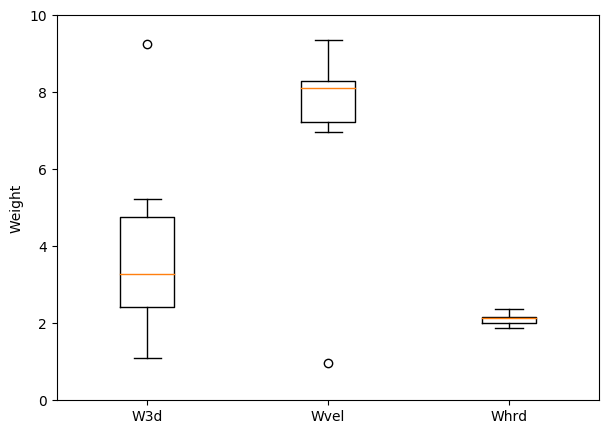

Weights: median
W3d : 3.2757338398925904
Wvel : 8.103508845703121
Whrd : 2.125016954220023


In [27]:
### Weighting stats ..
fig = figure(figsize=(7,5))

ax = subplot(111)
ax[:set_ylim]([0.,10.])
data = [mcfull[:w3dm] ,mcfull[:wvelm] , mcfull[:whrdm]]
boxplot(data)
ax[:set_xticklabels](["W3d","Wvel","Whrd"])
ylabel("Weight")

show()
println("Weights: median")
println("W3d : ",median(mcfull[:w3dm]))
println("Wvel : ",median(mcfull[:wvelm]))
println("Whrd : ",median(mcfull[:whrdm]))

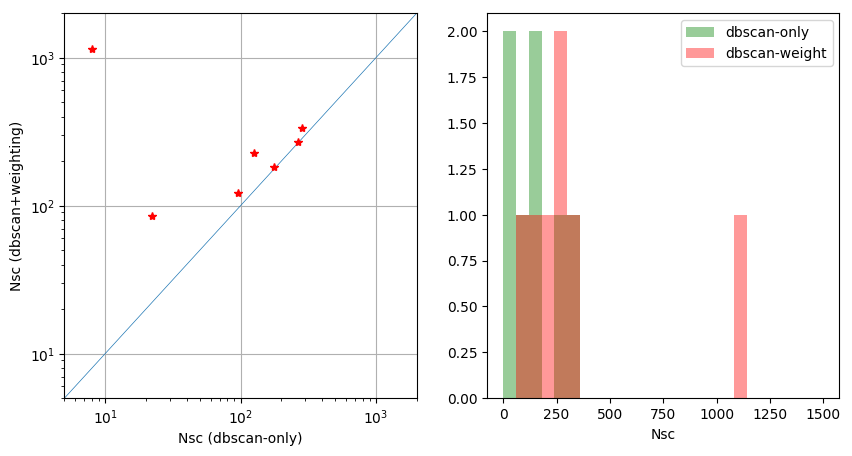

In [28]:
## Number of stars in the final SC

fig = figure(figsize=(10,5))

ax = subplot(121)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:nstars], scj[:nstars_1], "*r")
ax[:set_xlim]([5.,2000.])
ax[:set_ylim]([5.,2000.])
xlabel("Nsc (dbscan-only)")
ylabel("Nsc (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(122)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Nsc")

show()

###  Comparison of the SC properties for the optimization with DBSCAN only and DBSCAN+weighting 

<br>
<br>

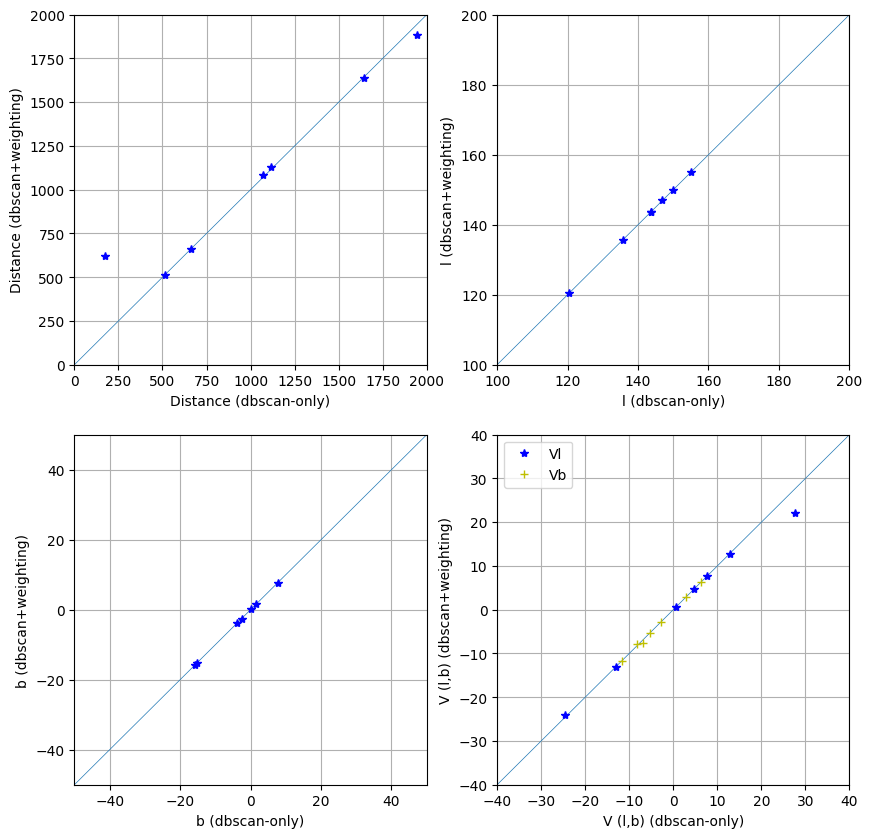

In [29]:
## Distance , position, velocity

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:distance], scj[:distance_1], "*b")
ax[:set_xlim]([0.,2000.])
ax[:set_ylim]([0.,2000.])
xlabel("Distance (dbscan-only)")
ylabel("Distance (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:l], scj[:l_1], "*b")
ax[:set_xlim]([100.,200.])
ax[:set_ylim]([100.,200.])
xlabel("l (dbscan-only)")
ylabel("l (dbscan+weighting)")

ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:b], scj[:b_1], "*b")
ax[:set_xlim]([-50.,50.])
ax[:set_ylim]([-50.,50.])
xlabel("b (dbscan-only)")
ylabel("b (dbscan+weighting)")

ax = subplot(224)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:vl], scj[:vl_1], "*b", label = "Vl")
plot(scj[:vb], scj[:vb_1], "+y", label = "Vb")
legend()
ax[:set_xlim]([-40.,40.])
ax[:set_ylim]([-40.,40.])
xlabel("V (l,b) (dbscan-only)")
ylabel("V (l,b) (dbscan+weighting)")

show()

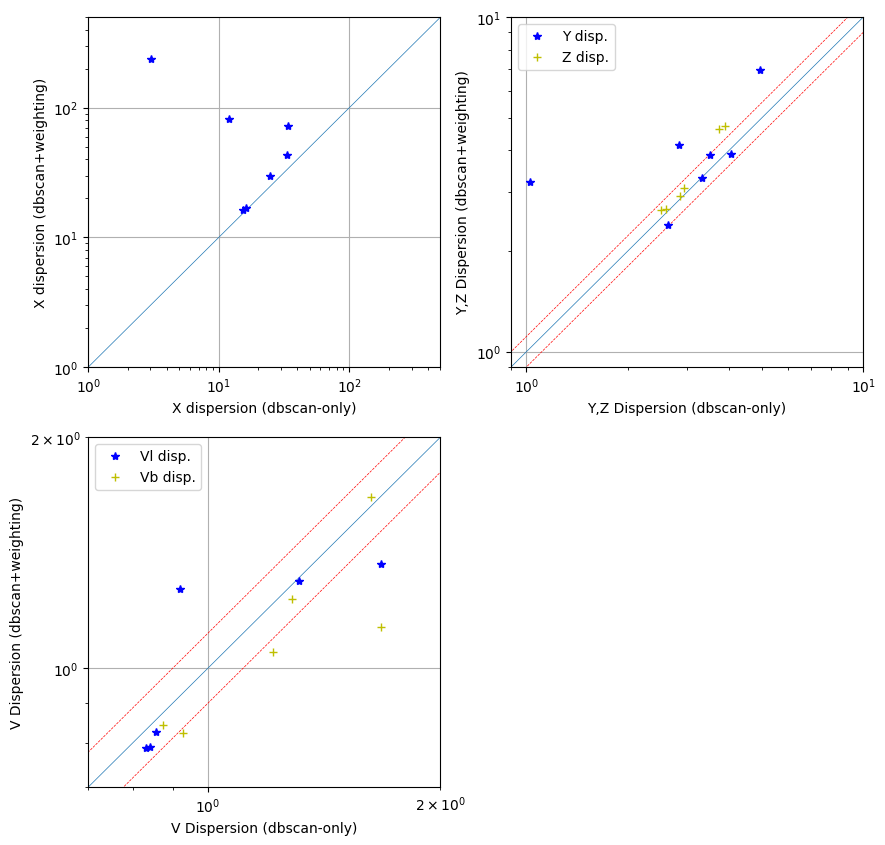

In [30]:
## Dispersions ...
fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:xdisp], scj[:xdisp_1], "*b")
ax[:set_xlim]([1,500.])
ax[:set_ylim]([1,500.])
xlabel("X dispersion (dbscan-only)")
ylabel("X dispersion (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(222)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:ydisp], scj[:ydisp_1], "*b", label = "Y disp.")
plot(scj[:zdisp], scj[:zdisp_1], "+y", label = "Z disp.")
legend()
ax[:set_xlim]([0.9,10.])
ax[:set_ylim]([0.9,10.])
xlabel("Y,Z Dispersion (dbscan-only)")
ylabel("Y,Z Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")


ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:vldisp], scj[:vldisp_1], "*b", label = "Vl disp.")
plot(scj[:vbdisp], scj[:vbdisp_1], "+y", label = "Vb disp.")
legend(loc="upper left")
ax[:set_xlim]([0.7, 2.])
ax[:set_ylim]([0.7, 2.])
xlabel("V Dispersion (dbscan-only)")
ylabel("V Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")
show()